# <span style="color: blue; font-size: 24px;">Microsoft Venture into the Movie Industry</span>


## By Evangeline Ngunjiri
## Part time Data Science Program
## Due date: 21/07/2023
## Technical mentor: MaryAnne Mwikali
## Blog post URL: https://github.com/EvangelineNgunjiri

<img src="film%20making.jpeg" style="width:500px;">


# <span style="color: blue; font-size: 24px;">Overview</span>

The project will primarily focus on the genres of movie films doing well in the industry at the Box Office. The goal is to provide the best recommendations to Microsoft for their new movie studio. As a result, this should guide Microsoft into making the most informed decisions through understanding of the films that are most popular in terms of performance in the industry. This will also bring in a competitive advantage into an already existing market.

# <span style="color: blue; font-size: 24px;">Business Problem</span>

Microsoft is considering venturing into the entertainment industry, specifically movie creation. However, it does not have full information necessary to enter into the industry and be successful. Therefore, the aim is to provide relevant data that enables the company to acquire insights into the popularity of various films in order to venture the market successfully.

By the end of the analysis,one will be able to answer the following:
- Most profitable genres in the industry
- Most popular production studios
- Movies making most profits
- Preferred languages to enhance inclusivity

<img src="business%20problem%202.jpeg" style="width:500px;">


# <span style="color: blue; font-size: 24px;">Objectives</span>

The objectives of this project are:
- Research current film trends and analyze box office success of various movie genres.
- Identify the most profitable and popular movie genres in the market.
- Develop a list of recommendations for Microsoft's new movie studio based on the research findings.
- Present a comprehensive report of the research findings and recommendations to the head of the new movie studio.

# <span style="color: blue; font-size: 24px;">Data Understanding</span>


In this project, we will work with movie datasets which will provide the following information:
1. Movie titles
2. Movie genre
3. Year of production
4. Runtime for each movie
5. Domestic and foreign gross earnings

The data is contained in fie separate csv files
1. imdb.title.basics: each record contains the movie title, genre, start year and run time
2. bom.movie_gross: each record contains the movie title, start year, studio, gross and foreign earnings
3. tn.movie_budgets.csv: each record contains movie ID, release date, movie title, production budget, domestic and foreign gross earnings in USD
4. tmdb.movies.csv: each record contains genre IDs, original language and title, level of popularity, release date, movie title, vote averages and vote counts.
5. title_ratings: each record contains the movie title, average ratings and number of votes.

In [1]:
#Import relevant libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# <span style="color: blue; font-size: 24px;">Load the datasets</span>


Create a dataframes title_basics and movie_gross that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

In [2]:
title_basics= pd.read_csv ('/Users/evangelin/Documents/Flatiron/Projects/Phase1/dsc-phase-1-project/zippedData/imdb.title.basics.csv')
print(title_basics.shape)
title_basics


(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
movie_gross= pd.read_csv('/Users/evangelin/Documents/Flatiron/Projects/Phase1/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz')
print(movie_gross.shape)
movie_gross


(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
movie_budget= pd.read_csv('/Users/evangelin/Documents/Flatiron/Projects/Phase1/dsc-phase-1-project/zippedData/tn.movie_budgets.csv')
print(movie_budget.shape)
movie_budget

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
popular_movies= pd.read_csv('/Users/evangelin/Documents/Flatiron/Projects/Phase1/dsc-phase-1-project/zippedData/tmdb.movies.csv')
print(popular_movies.shape)
popular_movies

(26517, 10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [6]:
title_ratings= pd.read_csv('/Users/evangelin/Documents/Flatiron/Projects/Phase1/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')
print(title_ratings)
title_ratings

           tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# <span style="color: blue; font-size: 24px;">Data Cleaning</span>

For data cleaning, I examined the structure of my dataset and dropped unnecessary columns and rows to ensure there are no missing values. Also i merged various datasets into a single one to make it easier to do analysis and correlations.

## <span style="color: blue; font-size: 24px;">Title_Basics data cleaning</span>


In [7]:
# Find info of the title_basics dataset
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# Calculate the percentage of null values in the runtime_minutes column

#Calculate total number of null values in title_basics
null_values=title_basics['runtime_minutes'].isna().sum()
null_values

31739

In [9]:
#Find number of total values in title_basics
total_values = len(title_basics['runtime_minutes'])
total_values

146144

In [10]:
#Find percentage of null values against total values
null_percentage = (null_values / total_values) * 100
null_percentage

21.71762097657105

In [11]:
#Since runtime_minutes column only contains 21% null values, replace the null values with the median
#Calculate median of runtime_minutes column
median_runtime=title_basics['runtime_minutes'].median()

#Replace the null values with the median
title_basics['runtime_minutes'].fillna(median_runtime, inplace=True)
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
#For genres column, drop rows that are blank
title_basics.dropna(subset=['genres'],inplace=True)
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [13]:
#Check for duplicates
duplicates = title_basics.duplicated()
# Counting the number of duplicates
num_duplicates = duplicates.sum()
num_duplicates

0

## <span style="color: blue; font-size: 24px;">Movie_gross data cleaning</span>


In [14]:
#Find info on movie_gross dataframe
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
#Find percentage of null values in domestic gross and foreign gross

#Calculate total number of null values in movie_gross dataset
null_values1=movie_gross['domestic_gross'].isna().sum()
null_values2=movie_gross['foreign_gross'].isna().sum()

#Find number of total values
total_values1 = len(movie_gross['domestic_gross'])
total_values2 = len(movie_gross['foreign_gross'])

#Find percentage of null values against total values
null_percentage1 = (null_values1 / total_values1) * 100
null_percentage2 = (null_values2 / total_values2) * 100

print(f'The percentage of null values in domestic gross is: {null_percentage1}')
print(f'The percentage of null values in foreign gross is: {null_percentage2}')

The percentage of null values in domestic gross is: 0.8266902863891349
The percentage of null values in foreign gross is: 39.85828166519043


In [16]:
#Since domestic and foreign colummns only contains 0.8% and 39% null values, replace the null values with the median
#Calculate median of domestic_gross column
median_domestic=movie_gross['domestic_gross'].median()

#Replace the null values with the median
movie_gross['domestic_gross'].fillna(median_domestic, inplace=True)


movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
#Change foreign_gross from object to float
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype(float)
movie_gross['foreign_gross']=movie_gross['foreign_gross'].astype(float)
movie_gross['foreign_gross']= movie_gross['foreign_gross'].fillna(0).astype(int)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   int64  
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 132.4+ KB


In [18]:
#Since we have replaced Nan values with 0, replace them with the median
#Calculate median of foreign_gross column
median_foreign=movie_gross['foreign_gross'].median()

#Replace the 0 values with the median
movie_gross['foreign_gross'].replace(0, median_foreign)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   int64  
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 132.4+ KB


In [19]:
#Drop the studio rows that are null
movie_gross.dropna(subset=["studio"], inplace=True)
movie_gross.info()
movie_gross.shape
movie_gross.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   int64  
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 158.5+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [20]:
movie_budget.info()
movie_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
#Remove the $ and , characters in the production_budget,domestic_gross and worlwide_gross
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('[$,]', '', regex=True)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('[$,]', '', regex=True)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('[$,]', '', regex=True)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [22]:
#convert the datatype from object to float
movie_budget['production_budget'] = movie_budget['production_budget'].astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype(float)
movie_budget.info()
movie_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [23]:
#Check the title_ratings dataset for missing values
title_ratings.info()
title_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [24]:
#Check the popular_movies dataset for missing values
popular_movies.info()
popular_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# <span style="color: blue; font-size: 24px;">Merging of Data frames</span>

Creation of joins is necessary to ease analysis of data and investigate relationships.


In [25]:
#Merge title_ratings and title_basics datasets
title_ratings_and_basics= pd.merge(title_basics, title_ratings, on='tconst', how='left')
title_ratings_and_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
140731,tt9916428,The Secret of China,The Secret of China,2019,87.0,"Adventure,History,War",NaN,NaN
140732,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
140733,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,NaN,NaN
140734,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,NaN,NaN


In [26]:
#Drop irrelevant columns
title_ratings_and_basics.drop(['original_title','runtime_minutes'], axis=1, inplace=True)
title_ratings_and_basics.head(100)

,tconst,primary_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...
95,tt0433533,Caleuche: El llamado del Mar,2012,"Drama,Fantasy,Horror",5.2,168.0
96,tt0433787,L'apocalisse delle scimmie,2012,Drama,6.9,11.0
97,tt0435651,The Giver,2014,"Drama,Romance,Sci-Fi",6.5,104999.0
98,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218.0


In [27]:
#Check for null values
title_ratings_and_basics.isna().sum()

tconst               0
primary_title        0
start_year           0
genres               0
averagerating    67684
numvotes         67684
dtype: int64

In [28]:
#Check info for the merged dataset
title_ratings_and_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 140735
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         140736 non-null  object 
 1   primary_title  140736 non-null  object 
 2   start_year     140736 non-null  int64  
 3   genres         140736 non-null  object 
 4   averagerating  73052 non-null   float64
 5   numvotes       73052 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ MB


In [29]:
#Fill Nan Values with the median
#Calculate median of averagerating column
median_rating=title_ratings_and_basics['averagerating'].median()

#Replace the null values with the median
title_ratings_and_basics['averagerating'].fillna(median_rating, inplace=True)
title_ratings_and_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 140735
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         140736 non-null  object 
 1   primary_title  140736 non-null  object 
 2   start_year     140736 non-null  int64  
 3   genres         140736 non-null  object 
 4   averagerating  140736 non-null  float64
 5   numvotes       73052 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ MB


In [30]:
#Fill Nan Values with the median
#Calculate median of numvotes column
median_votes=title_ratings_and_basics['numvotes'].median()

#Replace the null values with the median
title_ratings_and_basics['numvotes'].fillna(median_votes, inplace=True)
title_ratings_and_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 140735
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         140736 non-null  object 
 1   primary_title  140736 non-null  object 
 2   start_year     140736 non-null  int64  
 3   genres         140736 non-null  object 
 4   averagerating  140736 non-null  float64
 5   numvotes       140736 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ MB


In [31]:
#Check the top 5 genre of movies whose number of votes is more that 10,000
title_ratings_and_basics= title_ratings_and_basics[title_ratings_and_basics['numvotes'] > 10000]
title_ratings_and_basics.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes
35,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,15378.0
42,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886.0
48,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300.0
49,tt0360556,Fahrenheit 451,2018,"Drama,Sci-Fi,Thriller",4.9,14469.0
52,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116.0


# <span style="color: blue; font-size: 24px;">Analysis of the movie industry competitiveness</span>

In the cells below, i am going to analyse the competitiveness of the existing movie industry based on the cleaned and merged data above. I will look into the profitability of different genres, profitability per studio, and the ratings of genres.

# <span style="color: blue; font-size: 24px;">Budgeted domestic profit per movie</span>


In [32]:
#Calculate domestic profit margin and budgeted profit margin
#Budgeted Domestic profit= Domestic gross earnings- production budget
#Budgeted Worldwide profit= Worldwide gross earnings- production budget

#Add a column budgeted domestic profit
movie_budget['Budgeted_Domestic_profit']= movie_budget['domestic_gross']- movie_budget['production_budget']

movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Budgeted_Domestic_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7000.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,42482.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3662.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0


In [33]:
#Group the dataset to only show the movie, budgeted domestic profit and production budget
movie_budget_grouping = movie_budget.groupby('movie').agg({'Budgeted_Domestic_profit': 'sum', 'production_budget': 'sum'})

#Arrange the top 10 movies with the highest budgeted profit
movie_budget_grouping=movie_budget_grouping.nlargest(10,'Budgeted_Domestic_profit')

#Sort in descending order
movie_budget_grouping=movie_budget_grouping.sort_values('Budgeted_Domestic_profit', ascending=False)

#Reset the index
movie_budget_grouping = movie_budget_grouping.reset_index()

movie_budget_grouping

,movie,Budgeted_Domestic_profit,production_budget
0,Beauty and the Beast,700071431.0,180000000.0
1,Star Wars Ep. VII: The Force Awakens,630662225.0,306000000.0
2,Black Panther,500059566.0,200000000.0
3,Titanic,459363944.0,200000000.0
4,Star Wars Ep. IV: A New Hope,449998007.0,11000000.0
5,Jurassic World,437270625.0,215000000.0
6,ET: The Extra-Terrestrial,424610554.0,10500000.0
7,Incredibles 2,408581744.0,200000000.0
8,Avengers: Infinity War,378815482.0,300000000.0
9,Shrek 2,371226247.0,70000000.0


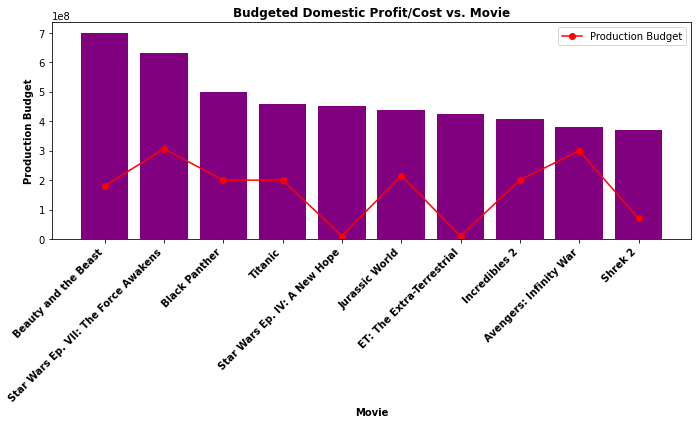

In [34]:
# Plotting the graph
plt.figure(figsize=(10, 6))

# Bar graph - Budgeted_Domestic_profit vs. Movie
plt.bar(movie_budget_grouping['movie'], movie_budget_grouping['Budgeted_Domestic_profit'], color='purple')
plt.xlabel('Movie',fontweight='bold')
plt.ylabel('Budgeted Domestic Profit',fontweight='bold')
plt.title('Budgeted Domestic Profit/Cost vs. Movie',fontweight='bold')

# Line plot - Production Budget vs. Movie
plt.plot(movie_budget_grouping['movie'], movie_budget_grouping['production_budget'], marker='o', color='red')
plt.ylabel('Production Budget',fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right',fontsize=10,fontweight='bold')

# Add a legend
plt.legend(['Production Budget'], loc='upper right')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


### <span style="color: blue; font-size: 24px;">Observation</span>

From the graph above, the bars represent the budgeted profitability while the line graph represents the production cost for the top 10 profit making movies. 
Beauty and the beast(an animation) is the number 1 profit making movie while shrek 2(also an animation) is number 10.

# <span style="color: blue; font-size: 24px;">Analysis of movies with the highest production budget against their domestic and global earnings</span>

In the cells below, i investigated the movies that cost the most to produce in order to check the correlation with their respective gross earnings.

In [35]:
#Group production budget, domestic and worldwide gross earnings
movie_budget_grouping2 = movie_budget.groupby('movie').agg({'production_budget': 'sum', 'domestic_gross': 'sum', 'worldwide_gross':'sum'})

#Arrange the top 10 expensive movies to produce
movie_budget_grouping2=movie_budget_grouping2.nlargest(10,'production_budget')

#Sort the values in descending order
movie_budget_grouping2=movie_budget_grouping2.sort_values('production_budget', ascending=False)

#Reset the index
movie_budget_grouping2 = movie_budget_grouping2.reset_index()


movie_budget_grouping2

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,Robin Hood,309000000.0,136311776.0,4.072064e+08
6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
8,Justice League,300000000.0,229024295.0,6.559452e+08
9,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08


In [36]:
# Calculate the correlation
correlation_domestic = movie_budget_grouping2['production_budget'].corr(movie_budget_grouping2['domestic_gross'])
correlation_worldwide = movie_budget_grouping2['production_budget'].corr(movie_budget_grouping2['worldwide_gross'])

# Print the correlations
print(f"Correlation between production budget and domestic gross: {correlation_domestic}")
print(f"Correlation between production budget and worldwide gross: {correlation_worldwide}")

Correlation between production budget and domestic gross: 0.012957169111023688
Correlation between production budget and worldwide gross: 0.305995186189154


### <span style="color: blue; font-size: 24px;">Interpretation</span>
From the calculation above, i observed a weak positive correlation between the production budget and their respective domestic and global gross earnings. This goes to say that using a lot of money in producing a movie does not necessarily guarantee profitability. 

<Figure size 1440x720 with 0 Axes>

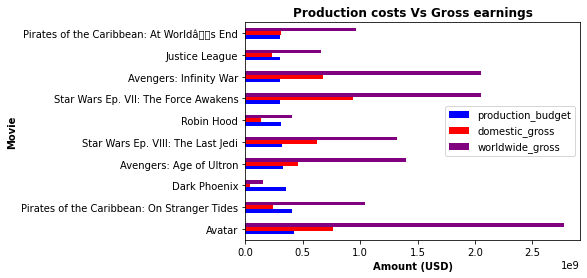

In [37]:
# Plotting the horizontal bar graph
plt.figure(figsize=(20, 10))

#Specify what to display on x and y axis
movie_budget_grouping2.plot(x="movie", y=['production_budget', 'domestic_gross', 'worldwide_gross'],kind="barh",color=['blue', 'red', 'purple'])

# Add x and y axis labels
plt.ylabel('Movie',fontweight='bold')
plt.xlabel('Amount (USD)',fontweight='bold')

# Add a title
plt.title('Production costs Vs Gross earnings', fontweight='bold')

# Add a legend
plt.legend()

# Plot the graph
plt.show()


### <span style="color: blue; font-size: 24px;">Observation</span>
 From the graph above, Avatar has the highest worldwide gross earnings despite have a lower production budget.
 Dark Phoenix on the other hand, has the lowest worldwide gross earnings yet production budget is almost the same as that of the other movies. 

# <span style="color: blue; font-size: 24px;">Analysis of genre against number of votes</span>

In the cells below, i shall analyse the popularity of genres against the number of votes

In [38]:
#Group the merged data set to only include genres and number of votes
genre_movies_sum = title_ratings_and_basics.groupby('genres')['numvotes'].sum()

#Show the top 10 voted genres
genre_movies_grouping=genre_movies_sum.nlargest(10)

#Sort the number of votes in descending order
genre_movies_grouping=genre_movies_grouping.sort_values(ascending=False)


genre_movies_grouping

genres
Action,Adventure,Sci-Fi       22968556.0
Action,Adventure,Fantasy       9573990.0
Adventure,Animation,Comedy     8473048.0
Action,Adventure,Comedy        7075766.0
Comedy,Drama,Romance           6822695.0
Drama                          5375869.0
Action,Crime,Drama             5095052.0
Comedy,Drama                   5026890.0
Comedy                         4873679.0
Drama,Romance                  4657540.0
Name: numvotes, dtype: float64

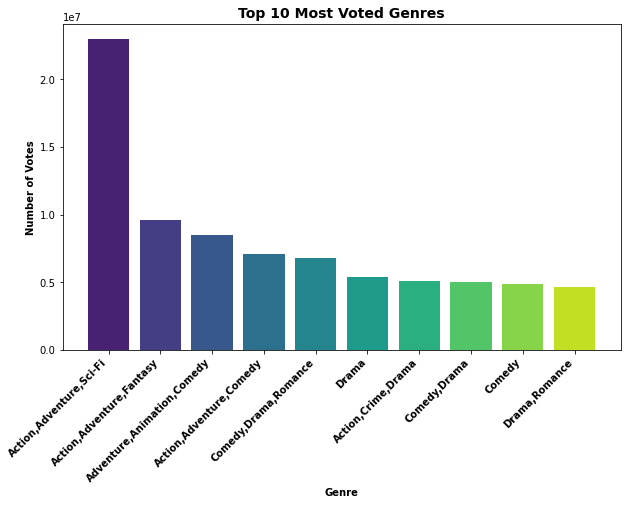

In [39]:
# Plot the plot size
plt.figure(figsize=(10, 6))

#Add colours
colors = sns.color_palette('viridis', 10)

#Plot the graph
plt.bar(genre_movies_grouping.index, genre_movies_grouping, color=colors)

#Add labels
plt.xlabel('Genre',fontweight='bold')
plt.ylabel('Number of Votes',fontweight='bold')

#Add a plot title
plt.title('Top 10 Most Voted Genres',fontsize=14, fontweight='bold')

#Specify the x and y ticks
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)

#Plot the graph
plt.show()

### <span style="color: blue; font-size: 24px;">Observation</span>

The top 3 most voted(most popular) genre of movies are (Action,Adventure, Sci-fi), (Action,Adventure, Fantasy) and (Adventure, Animation, Fantasy)

The least voted genre of movies are (Comedy, Drama),(Comedy) and (Drama,Romance)

# <span style="color: blue; font-size: 24px;">Analysis of earnings per production studio</span>

In the cells below, i shall look into the domestic gross earned per studios currently existing in the industry.

In [40]:
movie_gross = movie_gross.sort_values('domestic_gross', ascending=False)
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131,2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,1369,2018
1873,Jurassic World,Uni.,652300000.0,1019,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [41]:
#Group the movie_gross dataset to only include the studio and the mean of domestic gross
movie_gross_grouping = movie_gross.groupby('studio')['domestic_gross'].mean()

#Show the top 10 gross-earning studios
movie_gross_grouping= movie_gross_grouping.nlargest(10)

#Sort the top 10 gross-earning studios in descending order
movie_gross_grouping=movie_gross_grouping.sort_values(ascending=False)


movie_gross_grouping

studio
BV         1.737644e+08
P/DW       1.682900e+08
WB (NL)    8.879333e+07
Uni.       8.777138e+07
WB         8.691461e+07
Fox        8.051103e+07
Sony       7.691894e+07
Par.       7.609773e+07
MGM        6.666667e+07
Sum.       6.212473e+07
Name: domestic_gross, dtype: float64

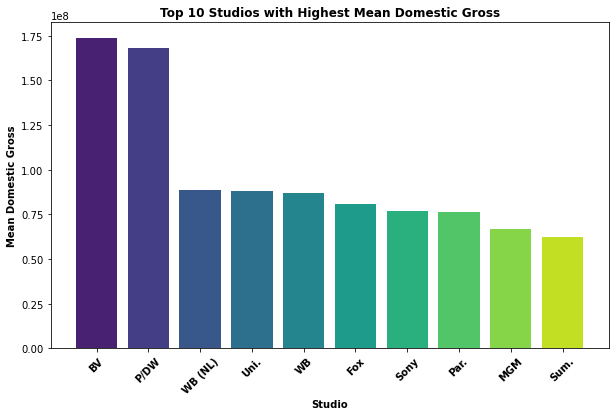

In [42]:
#Specify plot size
plt.figure(figsize=(10, 6))

#Plot colors
colors = sns.color_palette('viridis', len(movie_gross_grouping))

# Plot the bar graph
plt.bar(movie_gross_grouping.index, movie_gross_grouping, color=colors)

#Add x and y labels
plt.xlabel('Studio',fontweight='bold')
plt.ylabel('Mean Domestic Gross',fontweight='bold')

#Add a title
plt.title('Top 10 Studios with Highest Mean Domestic Gross',fontweight='bold')

#Format the xticks
plt.xticks(rotation=45,fontweight='bold')

#Plot the graph
plt.show()

### <span style="color: blue; font-size: 24px;">Observation</span>

From the graph above, the top 3 gross earning studios are BV, P/DW and WB(NL)
The bottom 3 gross earning studios are Par, MGM and Sum

# <span style="color: blue; font-size: 24px;">Analysis of popularity of movies per language</span>

In the cells below, i shall look at the popularity of movies in different languages.

In [43]:
#Group the popular_movies to show the language and vote counts only
popular_movies_mean = popular_movies.groupby('original_language')['vote_count'].sum()

#Show the top 10 voted languages
popular_movies_grouping=popular_movies_mean.nlargest(10)

#Arrange the top 10 languages in descending order
popular_movies_grouping=popular_movies_grouping.sort_values(ascending=False)


popular_movies_grouping

original_language
en    4874990
fr      75337
ja      54774
es      29396
it      17233
de      13900
ko      11017
sv       9726
da       8453
hi       7870
Name: vote_count, dtype: int64

In [44]:
# Remove english since it is an outlier
popular_movies_grouping[1:]

original_language
fr    75337
ja    54774
es    29396
it    17233
de    13900
ko    11017
sv     9726
da     8453
hi     7870
Name: vote_count, dtype: int64

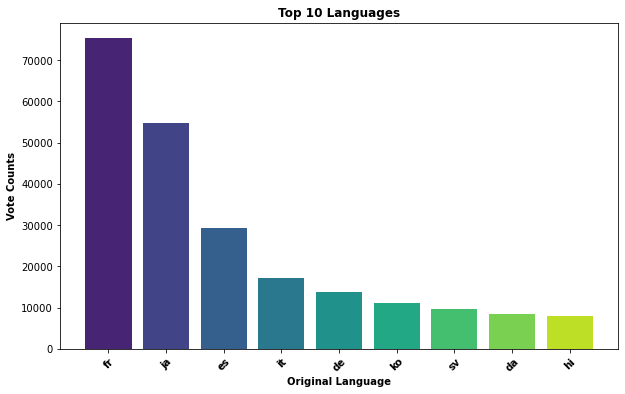

In [45]:
#Specify the plot size
plt.figure(figsize=(10, 6))

#Add colors
colors = sns.color_palette('viridis', len(popular_movies_grouping[1:]))

# Plot the bar graph
plt.bar(popular_movies_grouping[1:].index, popular_movies_grouping[1:], color=colors)

#Add x and y labels
plt.xlabel('Original Language',fontweight='bold')
plt.ylabel('Vote Counts',fontweight='bold')

#Add a plot title
plt.title('Top 10 Languages',fontweight='bold')

#Format the xticks
plt.xticks(rotation=45,fontweight='bold')

#Plot the graph
plt.show()

### <span style="color: blue; font-size: 24px;">Observation</span>

It is necessary to diversify movie production to enhance inclusivity among people of different races and areas dominated by other languages apart from English. 
From the graph above,besides English, the top 3 most popular languages are fr, ja, and es.
The least 3 popular languages are sv,da and hi

# <span style="color: blue; font-size: 24px;">Conclusion</span>


**1. Diversify movie languages**- Apart from English dominated areas, there are other niche markets that are dominated by other langauges. It is important for the movie industries to prioritize inclusivity for all people and races.

**2. Encourage audience feedback**- Microsoft can do this by asking the audience to rate the movies based on their preference or create a survey to enhance decision making.

**3. Focus on popular genres**- Microsoft should emphasize production of popular genres, that is, those with high ratings or with the most vote counts.

**4. Collaboration with successful production studios**- Microsoft should consider joining forces with the top earning production studios to create content that is popular to the audience.

**5. Incorporate technology to their data analysis**- Microsoft should continue to implement and incorporate technology-based data anaysis to do current analysis and predictive modelling of data.
